In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## 1. Extracting data

In [96]:
!kaggle datasets download blastchar/telco-customer-churn

telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [97]:
try:
    os.makedirs("./data", exist_ok=False)
except FileExistsError:
    print("Directory already exists.")


Directory already exists.


In [98]:
extract_path = "./data"
with zipfile.ZipFile("./telco-customer-churn.zip", "r") as churn:
    churn.extractall(extract_path)

In [99]:
data_path = os.path.join(extract_path, os.listdir(extract_path)[0])
raw_df = pd.read_csv(data_path, header=0, sep=",")
raw_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [100]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Changing TotalCharges to numeric:

In [101]:
raw_df["TotalCharges"] = pd.to_numeric(raw_df["TotalCharges"], errors="coerce")

### Missing values:

In [102]:
raw_df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [103]:
raw_df.dropna(inplace=True)

### Drop id

In [104]:
raw_df.drop("customerID", axis=1, inplace=True)

### Convert target variable to numerical

In [105]:
raw_df["Churn"].replace(to_replace="Yes", value=1, inplace=True)
raw_df["Churn"].replace(to_replace="No", value=0, inplace=True)

In [106]:
raw_df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,0


In [107]:
df = raw_df.copy()

### Handling categorical variables

In [108]:
df = pd.get_dummies(df)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [109]:
# !pip install opendatasets
# import opendatasets as od
# od.download('https://www.kaggle.com/datasets/blastchar/telco-customer-churn')

## Correlation analysis

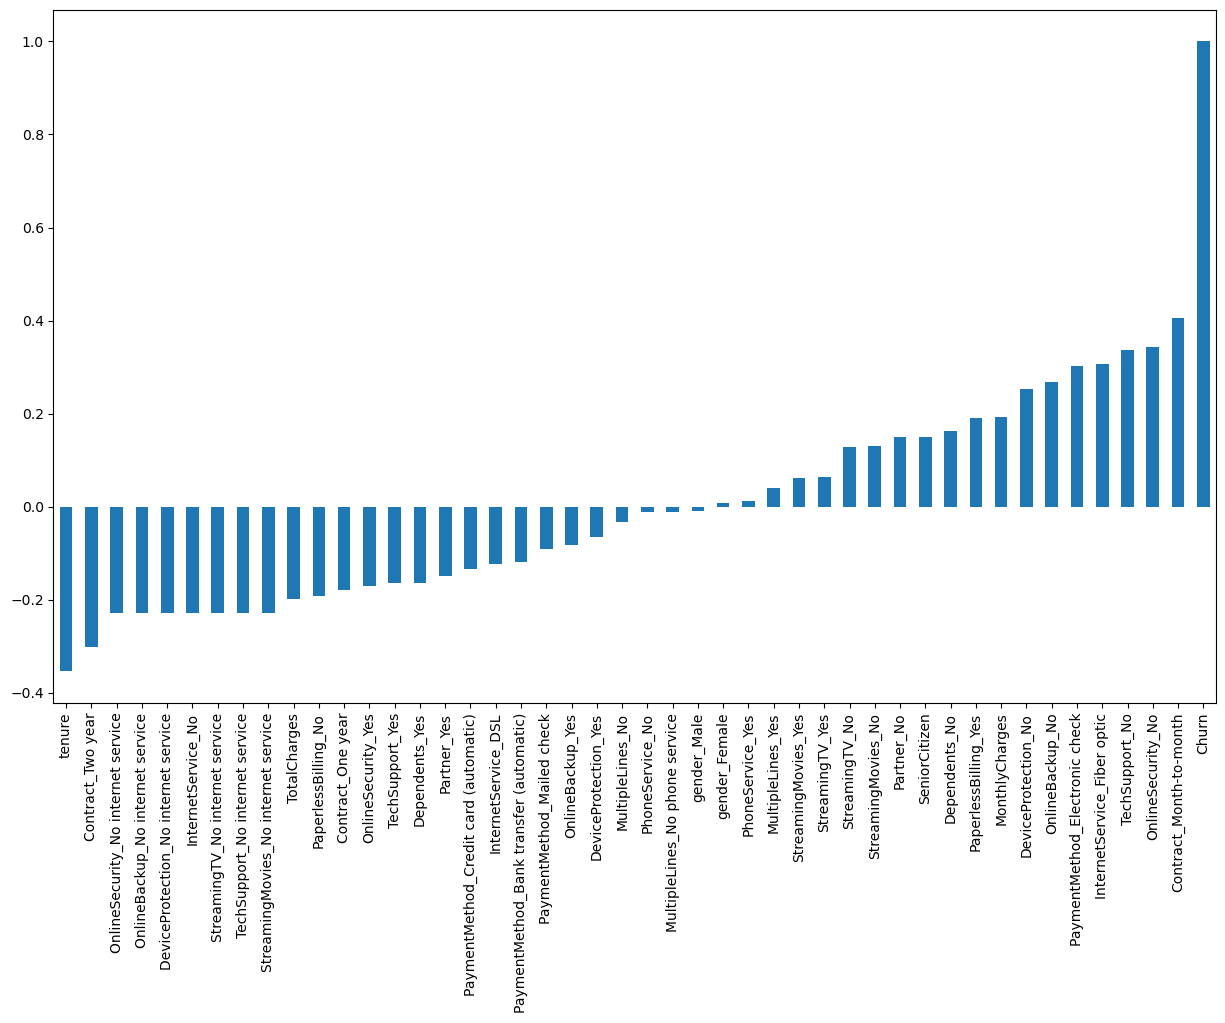

In [110]:
plt.figure(figsize=(15,9))
df.corr()["Churn"].sort_values(ascending=True).plot(kind="bar")
plt.show()

More correlated variables are `Contract_Month-to-month` (directly) and `tenure` (inversely).

## Scaling data

In [111]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df.columns
df_scaled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.323944,0.662189,0.227521,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,0.0,1.000000,0.845274,0.847461,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,0.0,0.140845,0.112935,0.037809,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,1.0,0.042254,0.558706,0.033210,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Data is already normalized and it is appropriate to be inputed into our `LogisticRegressor`

## Exploratory data analysis

In [113]:
def count_categorical(df, columns, ncols=2):
    # Subplots array
    nplot = len(columns)
    nrows = (nplot // ncols) + 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,30), constrained_layout=True)
    
    for ax, col in zip(axes.flatten(), columns):
        sns.countplot(data=df, x=col, hue="Churn", ax=ax)


In [114]:
cat_df = raw_df.select_dtypes(include="object").columns

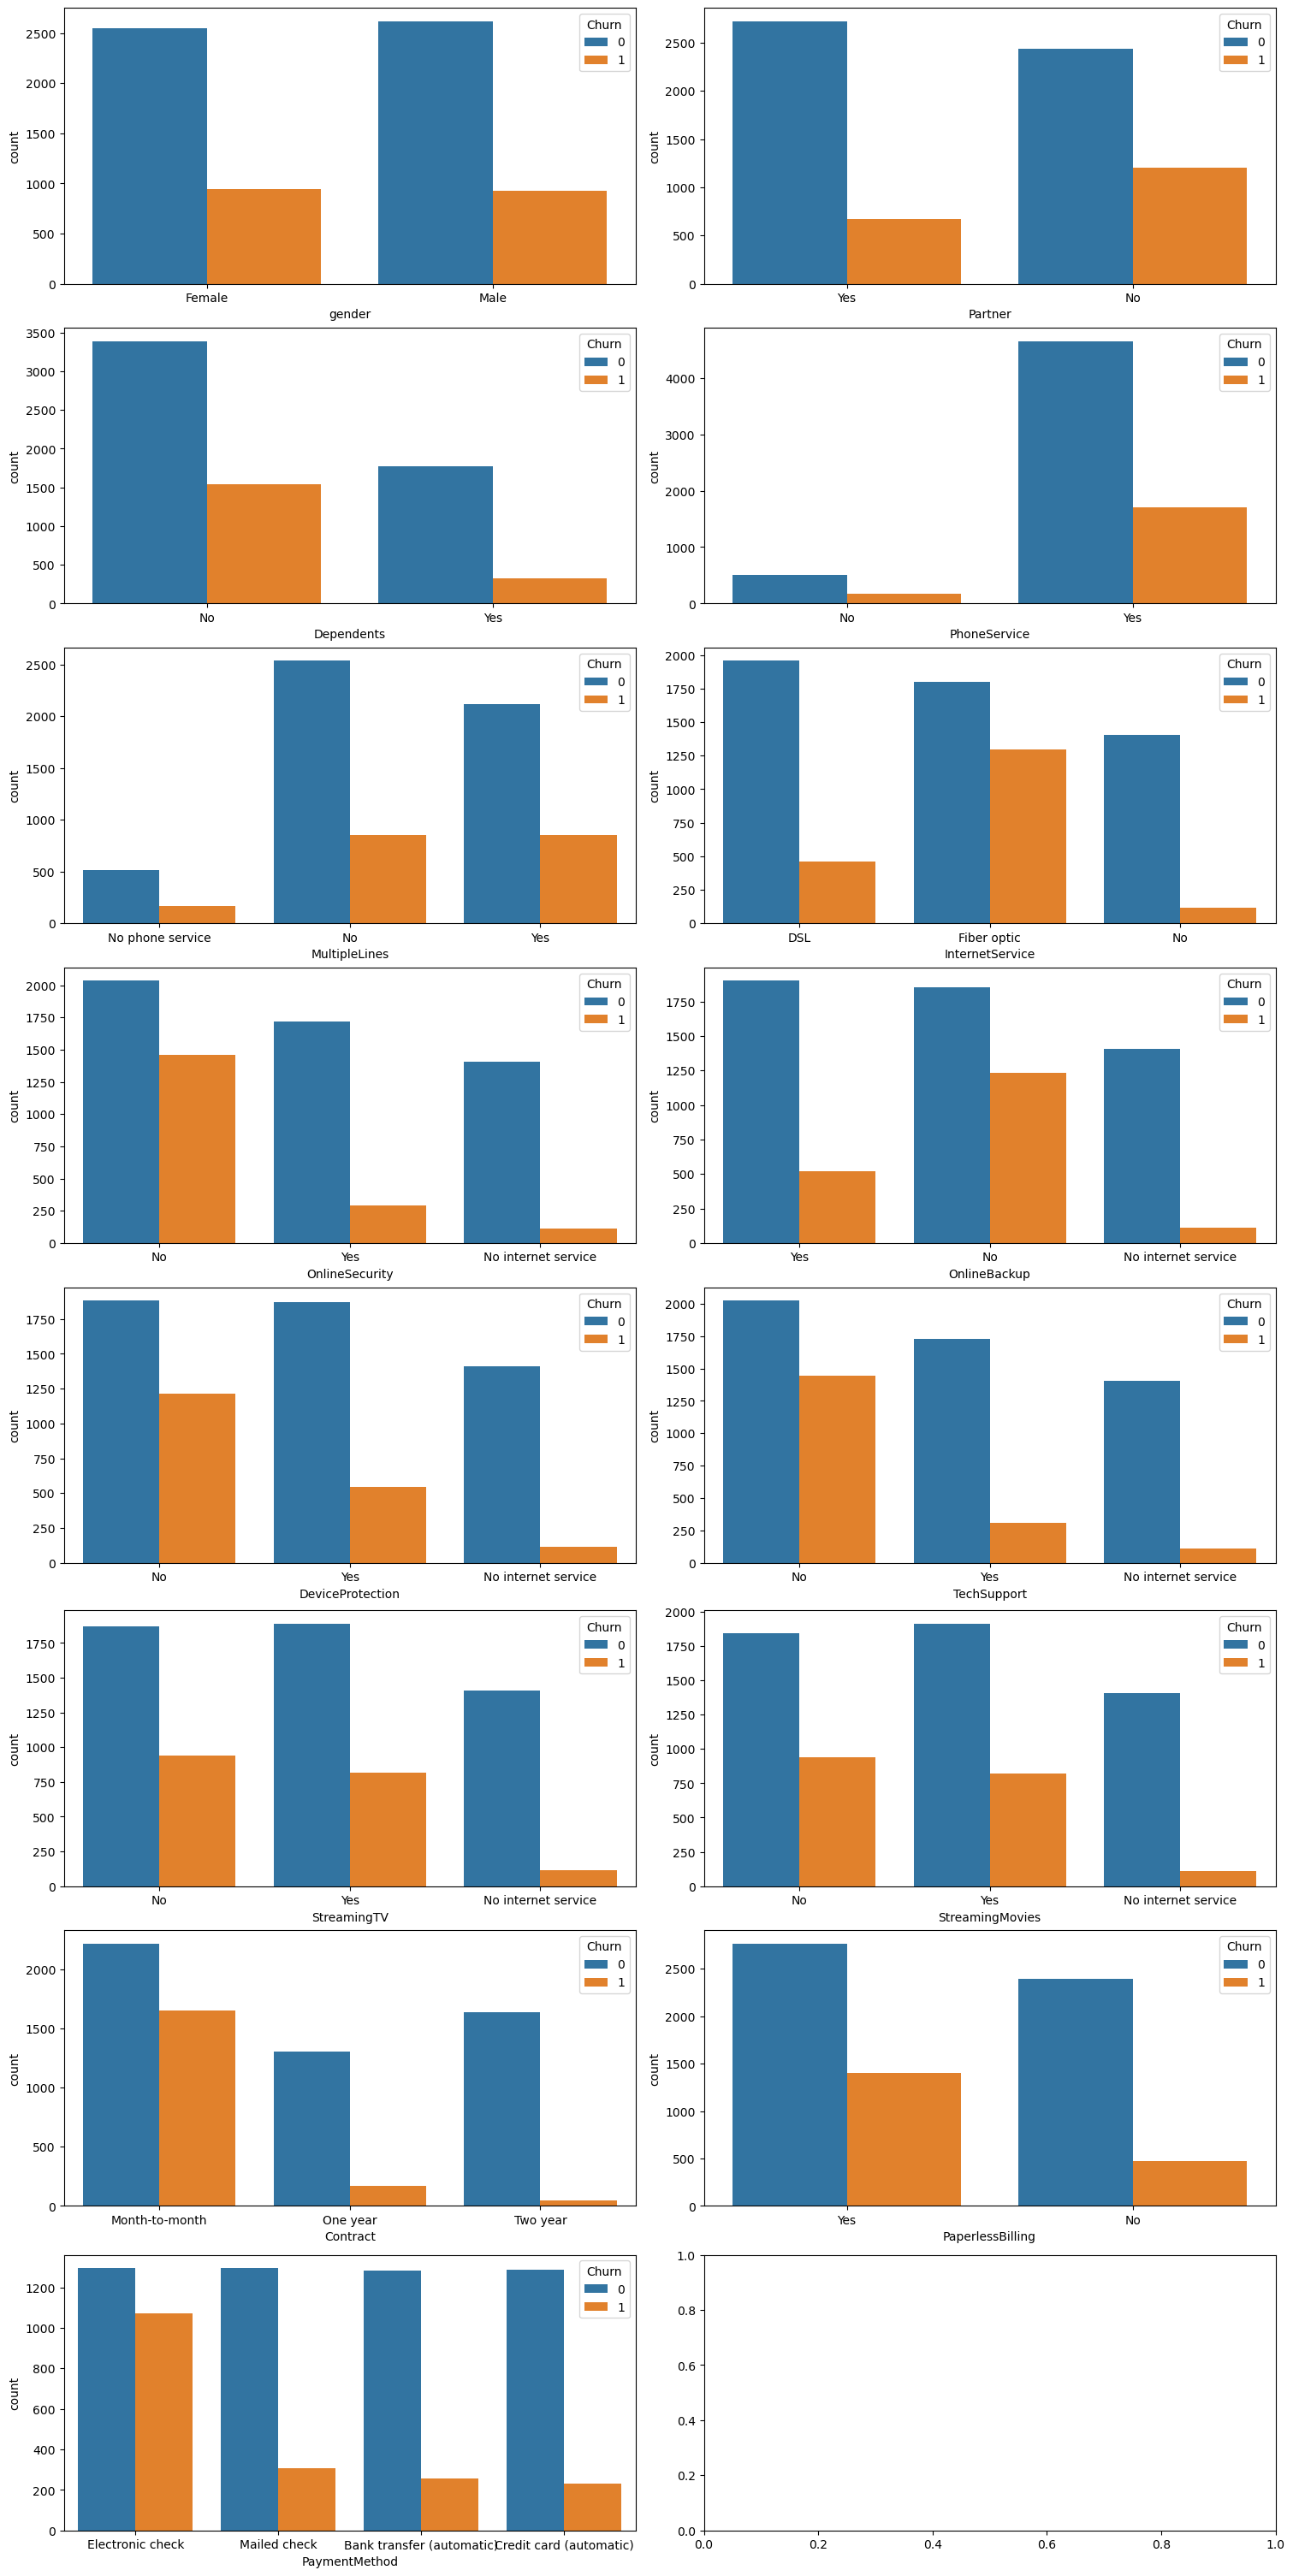

In [115]:
count_categorical(raw_df, columns=cat_df)

<Figure size 1000x1500 with 0 Axes>

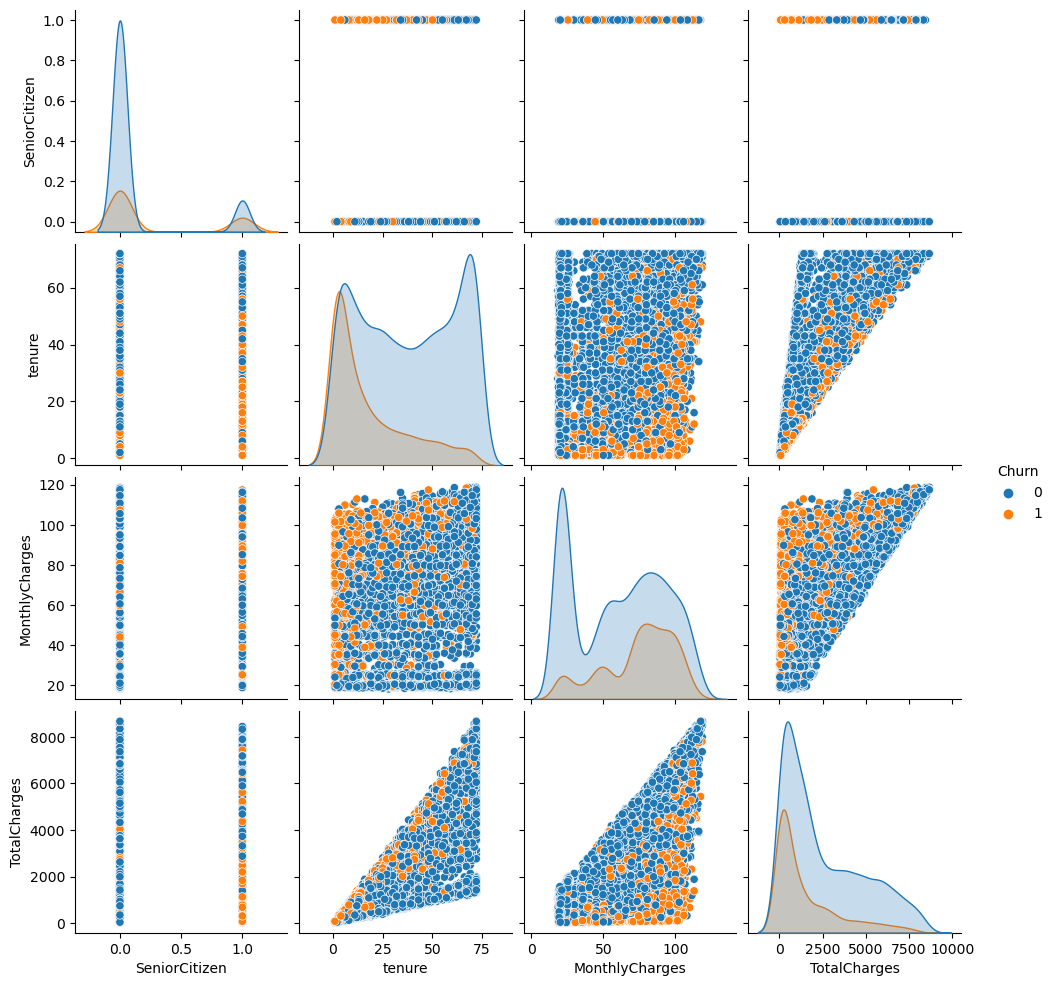

In [116]:
plt.figure(figsize=(10,15))
sns.pairplot(data=raw_df, hue="Churn")
plt.show()

### Training binomial logistic regression.

In [127]:
X = df_scaled.drop("Churn", axis=1) # Input predictors
y = df_scaled["Churn"].values # Target value

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [129]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

/home/fenilenvinileno97/miniconda3/envs/missing_values/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [130]:
from sklearn.metrics import accuracy_score

What is accuracy?

In [131]:
prediction_test = model.predict(X_test)
print(accuracy_score(y_test, prediction_test))

0.795734597156398


### `Evaluating the model`, maximum likelihood estimation (MLE)

$$
MLE = \sum_{i} y_{i}\log{p_{i}} + (1-y_{i})\log{(1-p_{i})}
$$

#### Features weight

In [135]:
model.predict_proba(X_test)

array([[0.99021177, 0.00978823],
       [0.86177511, 0.13822489],
       [0.30193029, 0.69806971],
       ...,
       [0.99028269, 0.00971731],
       [0.70132398, 0.29867602],
       [0.8286529 , 0.1713471 ]])

In [143]:
X.columns.value_counts().sum()

45

In [137]:
model.coef_.shape

(1, 45)

In [144]:
model.coef_

array([[ 2.16457157e-01, -3.10072712e+00, -1.62296457e-01,
         1.19636787e+00,  9.44195144e-04, -2.24725212e-02,
        -7.14897648e-02,  4.99614388e-02,  1.16814054e-01,
        -1.38342380e-01,  8.51180776e-02, -1.06646404e-01,
        -1.58851992e-01,  8.51180776e-02,  5.22055881e-02,
        -4.17807765e-01,  5.11414873e-01, -1.15135434e-01,
         2.40094860e-01, -1.15135434e-01, -1.46487752e-01,
         8.40808620e-02, -1.15135434e-01,  9.52624589e-03,
         5.65244265e-02, -1.15135434e-01,  3.70826814e-02,
         2.20221170e-01, -1.15135434e-01, -1.26614062e-01,
        -8.59165403e-02, -1.15135434e-01,  1.79523648e-01,
        -8.76589400e-02, -1.15135434e-01,  1.81266048e-01,
         7.42707912e-01, -9.75353231e-02, -6.66700915e-01,
        -1.13984622e-01,  9.24562959e-02, -2.72211526e-03,
        -1.58695171e-01,  2.16927409e-01, -7.70384487e-02]])

In [145]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

In [156]:
weights = pd.Series(model.coef_[0], index=X.columns.values)

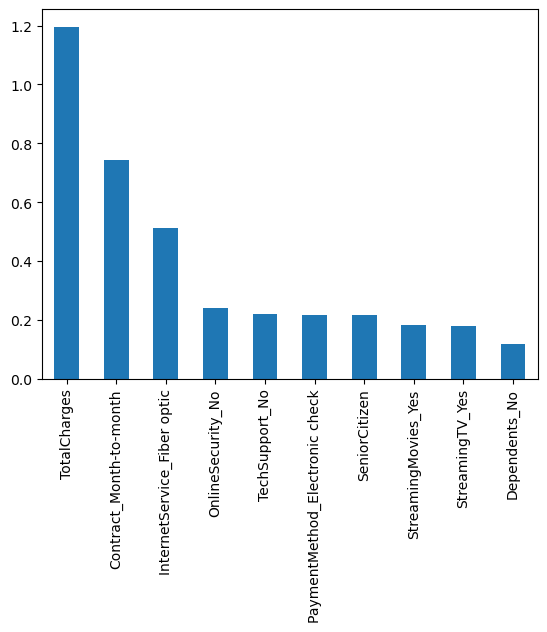

In [158]:
weights.sort_values(ascending=False)[:10].plot(kind="bar")
plt.show()

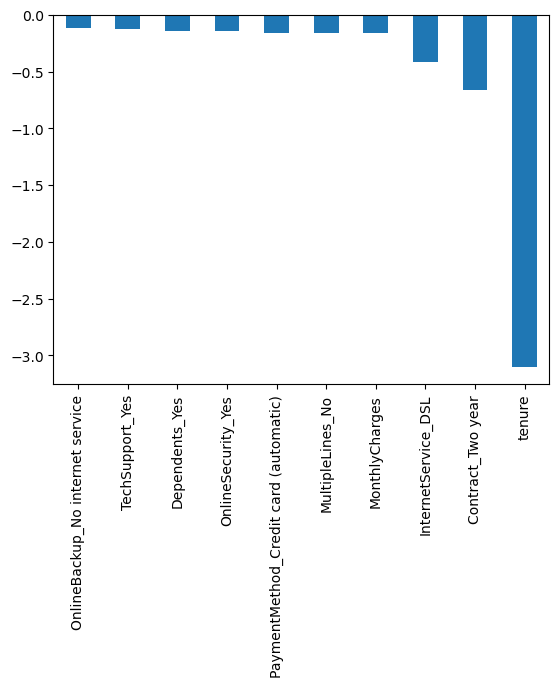

In [155]:
weights.sort_values(ascending=False)[-10:].plot(kind="bar")
plt.show()

In [164]:
from sklearn.metrics import ConfusionMatrixDisplay

In [163]:
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
cm

array([[1381,  168],
       [ 263,  298]])

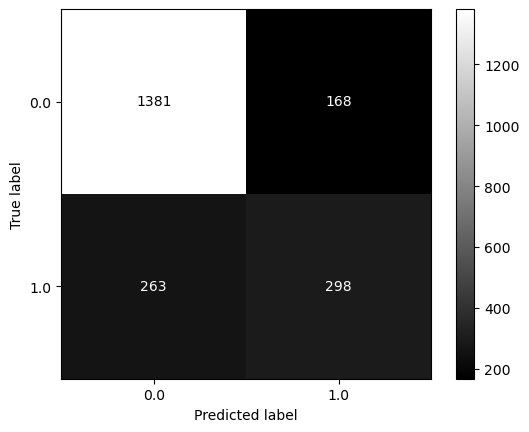

In [172]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="gray")
plt.show()